# Main Objective
In this notebook, we will develop a model to detect different objects in images with the *bounding-box coordinates* and the *confidence score* of each object detected. We will make use of advanced *Object Detection* algorithms that process images using **Azure Computer Vision**.

## Install cognitiveservices-vision-computervision
The Computer Vision service provides developers with access to advanced algorithms for processing images and returning information.

[More can be read over here](https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-object-detection)

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision opencv-python --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.0 MB/s eta 0:00:00


## Importing the libraries 
In this the necessary Python libraries are imported, which will be used to analyse the data-set and make use of Azure Computer Vision APIs to do Object-Detection tasks.

In [2]:
# the Azure Computer Vision Client used to interact with CV APIs. 
# Can be used for accessing advanced Computer Vision algorithms like Object-Detection, Face-Detection, Brand-Detection,
# Color-Schema detection, Image tagging etc
from azure.cognitiveservices.vision.computervision import ComputerVisionClient

# used for authentication to Azure Cognitive Services
from msrest.authentication import CognitiveServicesCredentials

# for display of image, bounding-boxes and confidence score
from PIL import Image
import urllib.request
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2

## Add your Computer Vision subscription and endpoint key
In this we will authenticate the **ComputerVisionClient** to the Azure Computer Vision resource using the *subscription-key* and the *endpoint* of the Azure resource.
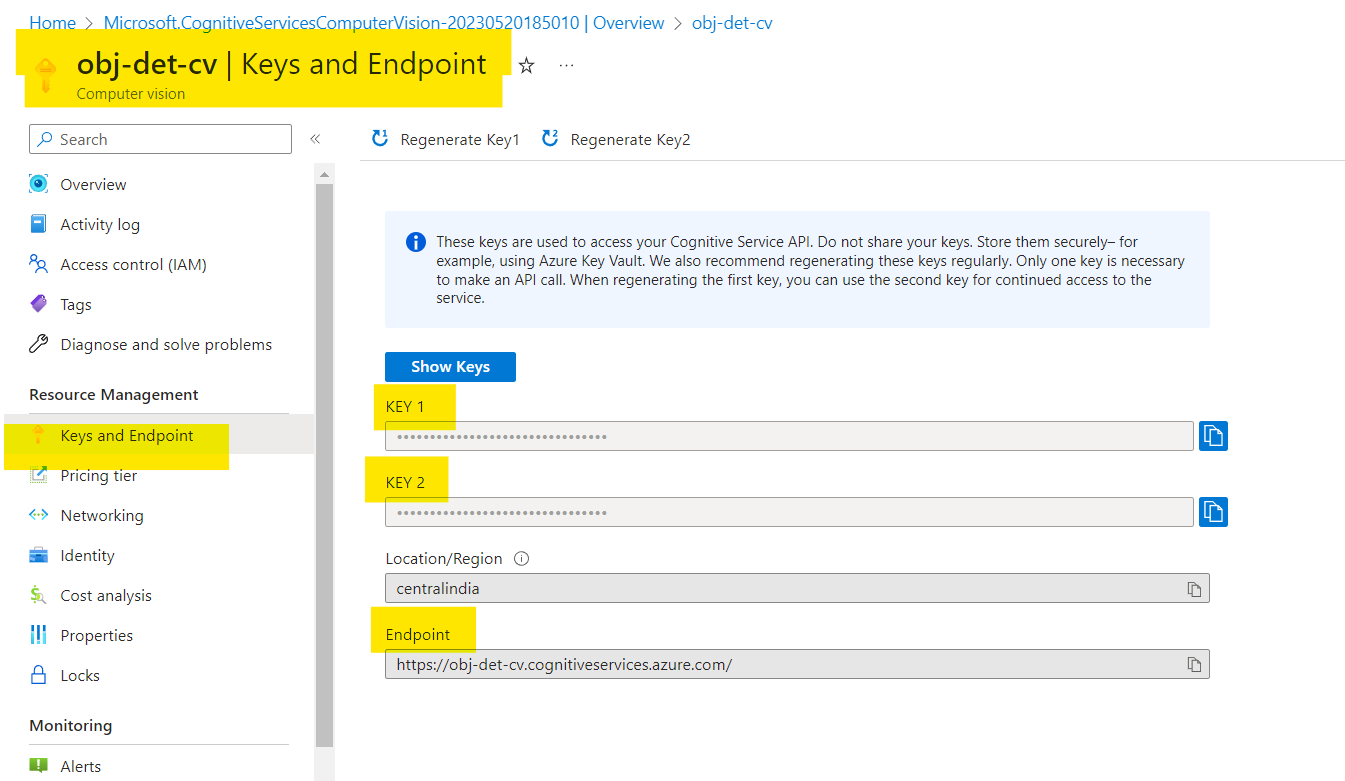

In [3]:
subscription_key = '<<computer-vision-key>>'
endpoint = '<<computer-vision-endpoint>>'

# building a computer vision client using the endpoint and credentials of the subscription-key
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

## Input Image
In this we will get and display an input image to be fed to the Azure Computer Vision resource.

In [4]:
# Get URL image with different objects for object detection
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"

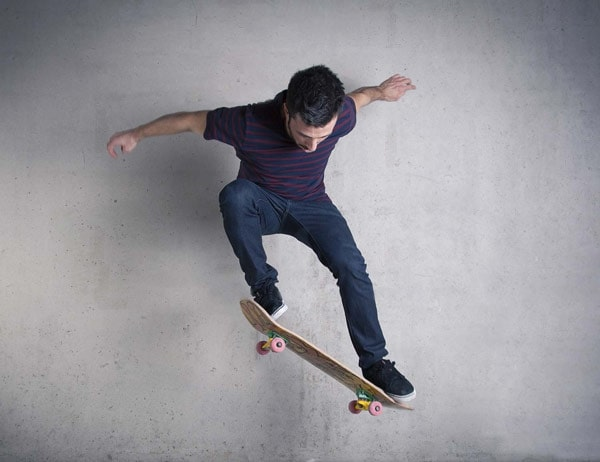

In [5]:
# displaying the image to be put for object-detection algorithm
urllib.request.urlretrieve(remote_image_url_objects,"image.jpg")

Image("image.jpg")

## Object Detection
In this we will make use of Azure computer-vision-client to detect objects with **bounding-box co-ordinates** and their **confidence-score** in the given input image.

In [6]:
print("===== Detect Objects - remote =====")
print()

# Call API with URL for Object-Detection
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")

if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object name {} with confidence {:.2f}% at location {}, {}, {}, {}"
              .format(object.object_property, object.confidence * 100, \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====

Detecting objects in remote image:
object name shirts with confidence 60.90% at location 213, 365, 85, 208
object name Jeans with confidence 67.70% at location 218, 402, 179, 384
object name Skateboard with confidence 83.80% at location 238, 417, 298, 416
object name person with confidence 93.50% at location 116, 419, 60, 386


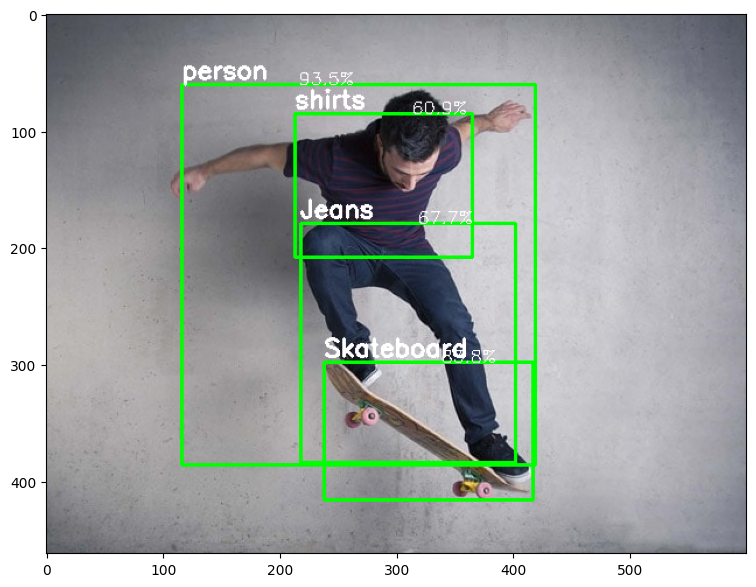

In [7]:
'''
Using this we display the detected bounding-boxes and 
the respective confidence-scores of each detected label 
in the image.
'''
# Read the image
img = cv2.imread("image.jpg")

# Draw rectangle(s) as per bounding box information
for object in detect_objects_results_remote.objects:

    # Get bounding boxes
    xmin, ymin, xmax, ymax = object.rectangle.x, object.rectangle.y, object.rectangle.x + object.rectangle.w, object.rectangle.y + object.rectangle.h
    
    # Get Label
    label = object.object_property
    
    # Get Confidence Score
    c_s = str(object.confidence * 100) + "%"
    
    # Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    # Add Label
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)    
    # Add Confidence Score
    cv2.putText(img,c_s,(xmin+100, ymin),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw image using matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img)
plt.show()